In [233]:
# Import des librairies
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

In [234]:
# Import des données
titanic_data = pd.read_csv("DATA/titanic.csv")

In [235]:
# Copie des données
df = titanic_data.copy()

In [236]:
df.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [237]:
df.columns

Index(['Unnamed: 0', 'pclass', 'survived', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body',
       'home.dest'],
      dtype='object')

In [238]:
df.isnull().sum() / df.shape[0]

Unnamed: 0    0.000000
pclass        0.000000
survived      0.000000
name          0.000000
sex           0.000000
age           0.200917
sibsp         0.000000
parch         0.000000
ticket        0.000000
fare          0.000764
cabin         0.774637
embarked      0.001528
boat          0.628724
body          0.907563
home.dest     0.430863
dtype: float64

In [239]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1309 non-null   int64  
 1   pclass      1309 non-null   int64  
 2   survived    1309 non-null   int64  
 3   name        1309 non-null   object 
 4   sex         1309 non-null   object 
 5   age         1046 non-null   float64
 6   sibsp       1309 non-null   int64  
 7   parch       1309 non-null   int64  
 8   ticket      1309 non-null   object 
 9   fare        1308 non-null   float64
 10  cabin       295 non-null    object 
 11  embarked    1307 non-null   object 
 12  boat        486 non-null    object 
 13  body        121 non-null    float64
 14  home.dest   745 non-null    object 
dtypes: float64(3), int64(5), object(7)
memory usage: 153.5+ KB


In [240]:
"""
On enlève :
    * "Unnamed: 0" car il s'agit d'une collonne index superflue
    * "body" car la plupart des observations n'ont pas cette données
    * "name" car les algorithme qu'on utilise n'ont pas la capacité d'établir la corrélation entre le nom et la survie du passager + problème moral (?) 
"""
df_draft = df.drop(columns=["Unnamed: 0", "name", "ticket", "cabin", "boat", "body", "home.dest"])

In [241]:
df_draft.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.0000,0,0,211.3375,S
1,1,1,male,0.9167,1,2,151.5500,S
2,1,0,female,2.0000,1,2,151.5500,S
3,1,0,male,30.0000,1,2,151.5500,S
4,1,0,female,25.0000,1,2,151.5500,S


<Axes: xlabel='survived', ylabel='count'>

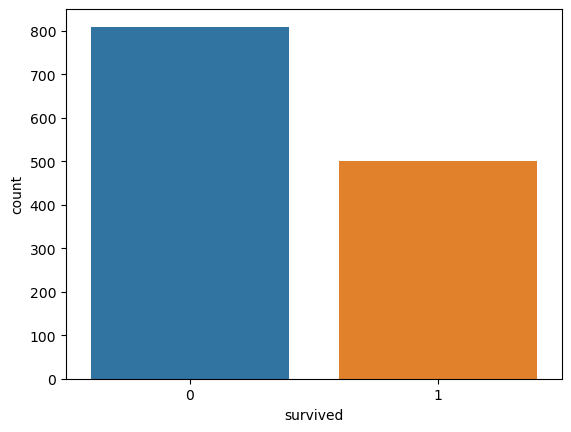

In [242]:
sns.countplot(x="survived", data=df)

<Axes: xlabel='survived', ylabel='age'>

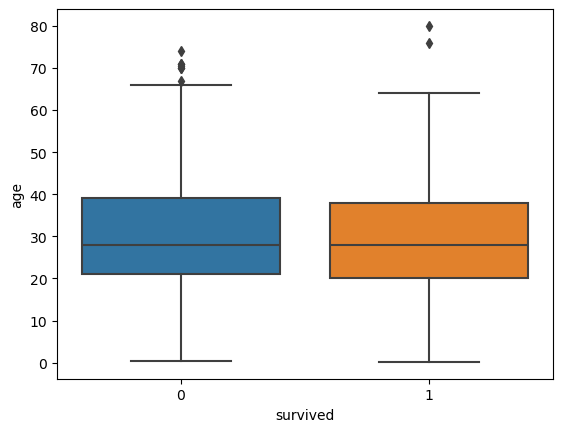

In [243]:
sns.boxplot(x="survived", y="age", data=df)

In [244]:
def age_imputation(columns):
    age = columns[0]
    pclass = columns[1]

    if pd.isnull(age):
        if pclass == 1:
            return 39
        elif pclass == 2:
            return 29
        else:
            return 25
    else:
        return age

In [245]:
# en entrée df[["age", "pclass"]]
df_draft["age"] = df_draft[["age", "pclass"]].apply(age_imputation, axis=1)

In [246]:
df_draft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   sex       1309 non-null   object 
 3   age       1309 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   fare      1308 non-null   float64
 7   embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 81.9+ KB


In [247]:
df_draft = df_draft.dropna(axis=0)
df_draft.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1306 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1306 non-null   int64  
 1   survived  1306 non-null   int64  
 2   sex       1306 non-null   object 
 3   age       1306 non-null   float64
 4   sibsp     1306 non-null   int64  
 5   parch     1306 non-null   int64  
 6   fare      1306 non-null   float64
 7   embarked  1306 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 91.8+ KB


In [248]:
df_draft["family_size"] = df["sibsp"] + df["parch"]
df_draft.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,family_size
0,1,1,female,29.0000,0,0,211.3375,S,0
1,1,1,male,0.9167,1,2,151.5500,S,3
2,1,0,female,2.0000,1,2,151.5500,S,3
3,1,0,male,30.0000,1,2,151.5500,S,3
4,1,0,female,25.0000,1,2,151.5500,S,3


In [249]:
df_draft = df_draft.drop(columns=["sibsp", "parch"])
df_draft.head()

,pclass,survived,sex,age,fare,embarked,family_size
0,1,1,female,29.0000,211.3375,S,0
1,1,1,male,0.9167,151.5500,S,3
2,1,0,female,2.0000,151.5500,S,3
3,1,0,male,30.0000,151.5500,S,3
4,1,0,female,25.0000,151.5500,S,3


In [250]:
df_draft["sex"] = df_draft["sex"].map({"female": 0, "male": 1})
df_draft.head()

,pclass,survived,sex,age,fare,embarked,family_size
0,1,1,0,29.0000,211.3375,S,0
1,1,1,1,0.9167,151.5500,S,3
2,1,0,0,2.0000,151.5500,S,3
3,1,0,1,30.0000,151.5500,S,3
4,1,0,0,25.0000,151.5500,S,3


In [251]:
df_draft.describe()

,pclass,survived,sex,age,fare,family_size
count,1306.000000,1306.000000,1306.000000,1306.000000,1306.000000,1306.000000
mean,2.296325,0.381317,0.644717,29.311001,33.223956,0.885911
std,0.837037,0.485896,0.478782,13.067735,51.765986,1.584891
min,1.000000,0.000000,0.000000,0.166700,0.000000,0.000000
25%,2.000000,0.000000,0.000000,22.000000,7.895800,0.000000
50%,3.000000,0.000000,1.000000,26.000000,14.454200,0.000000
75%,3.000000,1.000000,1.000000,36.375000,31.275000,1.000000
max,3.000000,1.000000,1.000000,80.000000,512.329200,10.000000


In [252]:
df_draft = pd.get_dummies(df_draft, drop_first=True)
df_draft.head()

,pclass,survived,sex,age,fare,family_size,embarked_Q,embarked_S
0,1,1,0,29.0000,211.3375,0,False,True
1,1,1,1,0.9167,151.5500,3,False,True
2,1,0,0,2.0000,151.5500,3,False,True
3,1,0,1,30.0000,151.5500,3,False,True
4,1,0,0,25.0000,151.5500,3,False,True


In [253]:
df_draft["embarked_Q"] = df_draft["embarked_Q"].map({False: 0, True: 1})
df_draft["embarked_S"] = df_draft["embarked_S"].map({False: 0, True: 1})
df_draft.head()

,pclass,survived,sex,age,fare,family_size,embarked_Q,embarked_S
0,1,1,0,29.0000,211.3375,0,0,1
1,1,1,1,0.9167,151.5500,3,0,1
2,1,0,0,2.0000,151.5500,3,0,1
3,1,0,1,30.0000,151.5500,3,0,1
4,1,0,0,25.0000,151.5500,3,0,1


In [29]:
X = df_draft.drop(columns=["survived"])
y = np.array(df_draft["survived"]).reshape(-1, 1)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)